In [13]:
import os
import random
import sys
sys.path.append("../utils")
from dataset import create_combined_sequence_dataset
import sys
sys.path.append("../models")
from eegsnet import build_eegsnet
import tensorflow as tf
import matplotlib.pyplot as plt


In [14]:
all_subjects = sorted([
    name for name in os.listdir("../data/spectrograms")
    if name.startswith("SC") and os.path.isfile(os.path.join("../data/spectrograms", name, "labels.json"))
])

random.seed(42)
random.shuffle(all_subjects)

split_idx = int(0.8 * len(all_subjects))
train_subjects = all_subjects[:split_idx]
val_subjects = all_subjects[split_idx:]

print("Train:", len(train_subjects), "Val:", len(val_subjects))


Train: 122 Val: 31


In [15]:
train_ds = create_combined_sequence_dataset(train_subjects, sequence_length=10, batch_size=16)
val_ds = create_combined_sequence_dataset(val_subjects, sequence_length=10, batch_size=16, shuffle=False)


In [16]:
model = build_eegsnet(input_shape=(60, 76, 3), sequence_length=10, num_classes=5)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

model.compile(
    optimizer='adam',
    loss={'main_output': loss_fn, 'aux_output': loss_fn},
    loss_weights={'main_output': 1.0, 'aux_output': 0.5},
    metrics={'main_output': 'accuracy', 'aux_output': 'accuracy'}
)


In [17]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)


Epoch 1/20
   1023/Unknown 270s 197ms/step - aux_output_accuracy: 0.2922 - aux_output_loss: 1.5773 - loss: 2.3084 - main_output_accuracy: 0.2950 - main_output_loss: 1.5198

d:\UNI\پروژه پایانی\Sleep Stage Project 1.0\.venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1023/1023 ━━━━━━━━━━━━━━━━━━━━ 299s 225ms/step - aux_output_accuracy: 0.2922 - aux_output_loss: 1.5772 - loss: 2.3083 - main_output_accuracy: 0.2950 - main_output_loss: 1.5197 - val_aux_output_accuracy: 0.2686 - val_aux_output_loss: 1.6211 - val_loss: 2.7553 - val_main_output_accuracy: 0.2463 - val_main_output_loss: 1.9334
Epoch 2/20
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 286s 250ms/step - aux_output_accuracy: 0.4318 - aux_output_loss: 1.3396 - loss: 1.9497 - main_output_accuracy: 0.4416 - main_output_loss: 1.2799 - val_aux_output_accuracy: 0.2475 - val_aux_output_loss: 2.7437 - val_loss: 4.3085 - val_main_output_accuracy: 0.2358 - val_main_output_loss: 2.9183
Epoch 3/20
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 266s 230ms/step - aux_output_accuracy: 0.8395 - aux_output_loss: 0.4549 - loss: 0.4656 - main_output_accuracy: 0.9208 - main_output_loss: 0.2382 - val_aux_output_accuracy: 0.2515 - val_aux_output_loss: 4.5007 - val_loss: 6.1970 - val_main_output_accuracy: 0.2423 - val_main_output_loss: 3.9225
Epo

In [18]:
model.save("../models/eegsnet_multi_subject.keras")


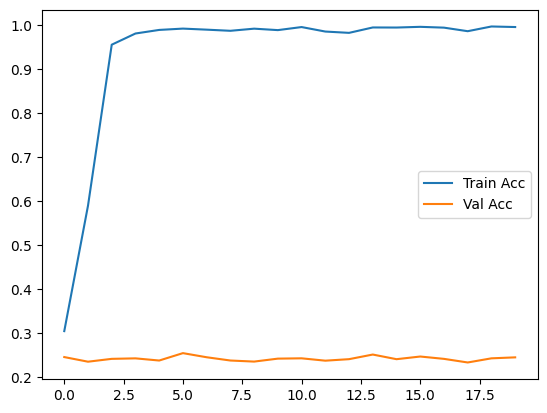

In [19]:
plt.plot(history.history['main_output_accuracy'], label="Train Acc")
plt.plot(history.history['val_main_output_accuracy'], label="Val Acc")
plt.legend()
plt.show()